In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import unittest
from tweezepy.smmcalibration import loglikelihood
loglikelihood(1,1,1)

-1.0

In [85]:
import tweezepy.smmcalibration as smm
smm.aliasPSD(1,1,1,1)
smm.lansdorpPSD(1,1,1,1)
smm.lansdorpPSD2(1,1,1,1,1)
smm.SMMAV(1,1,1)
smm.SMMAV2(1,1,1,1)
smm.m_generator(10)

array([1, 2])

In [86]:
smm.m_generator(10)

array([1, 2])

In [ ]:
from tweezepy.smmcalibration import aliasPSD,lansdorpPSD,lansdorpPSD2,SMMAV,SMMAV2

In [34]:
assert aliasPSD(1,1,1,1) == 8.872208996328476

In [56]:
class MethodTests(unittest.TestCase):
    def test_loglikelihood(self):
        self.assertEqual(loglikelihood(1,1,1),-1.0)
    def test_aliasPSD(self):
        self.assertAlmostEqual(aliasPSD(1,1,1,1),8.872208996328476)
    def test_lansdorpPSD(self):
        self.assertAlmostEqual(lansdorpPSD(1,1,1,1),8.2)
    def test_lansdorpPSD2(self):
        self.assertAlmostEqual(lansdorpPSD2(1,1,1,1,1),9.2)

In [57]:
mt = MethodTests()
mt.test_lansdorpPSD2()

In [52]:
from tweezepy.smmcalibration import psd
np.random.seed(0)
ran = np.random.normal(0,1,100)
f,dens = psd(ran,1,1)
outfile = 'test_psd.npz'
np.savez(outfile,f=f,dens=dens)

In [74]:
outfile = 'test_psd.npz'
data = np.load(outfile)
data['f']
data['dens']

array([4.76640575, 4.02777051, 0.77295682, 0.07649521, 0.29256722,
       0.53128343, 0.4260453 , 1.42107795, 0.11931608, 0.9432883 ,
       0.65659058, 0.96072737, 1.32352081, 1.00324029, 3.27559378,
       3.16233137, 1.21664534, 0.13446321, 0.03733682, 0.23662722,
       0.05709442, 0.27654579, 0.17643201, 0.5539893 , 1.03095454,
       0.78024076, 1.30312167, 0.67140806, 1.42187452, 0.9855343 ,
       0.70351122, 0.10029112, 0.58992168, 1.04552226, 0.5102238 ,
       0.19765678, 0.18138225, 0.88427853, 0.07408301, 1.42230914,
       2.20224599, 0.48425979, 1.10987138, 0.1499655 , 0.65060419,
       0.44499969, 0.66160873, 1.17717034, 2.82508474, 1.618224  ,
       0.78859457, 1.618224  , 2.82508474, 1.17717034, 0.66160873,
       0.44499969, 0.65060419, 0.1499655 , 1.10987138, 0.48425979,
       2.20224599, 1.42230914, 0.07408301, 0.88427853, 0.18138225,
       0.19765678, 0.5102238 , 1.04552226, 0.58992168, 0.10029112,
       0.70351122, 0.9855343 , 1.42187452, 0.67140806, 1.30312

In [82]:
class PSDTests(unittest.TestCase):
    def test_psd(self):
        np.random.seed(0)
        ran = np.random.normal(0,1,100)
        f,dens = psd(ran,1,1)
        data = np.load('test_psd.npz')
        self.assertIsNone(np.testing.assert_array_equal(f, data['f']))
        self.assertIsNone(np.testing.assert_array_equal(dens, data['dens']))
psdtests = PSDTests()
psdtests.test_psd()

In [1]:
from tweezepy.smmcalibration import oavar
np.random.seed(0)
ran = np.random.normal(0,1,100)
tau,eta,oav = oavar(ran,1)
outfile = 'test_oavar.npz'
np.savez(outfile,tau = tau,eta=eta,oav=oav)

In [5]:
import numpy as p
from tweezepy.smmcalibration import totvar
np.random.seed(0)
ran = np.random.normal(0,1,100)
tau,eta,oav = totvar(ran,1)
outfile = 'test_totvar.npz'
np.savez(outfile,tau = tau,eta=eta,oav=oav)

In [22]:
def set_unit(unit):
    """Register a unit on a function"""
    def decorator_set_unit(func):
        func.unit = unit
        return func
    return decorator_set_unit

def aliasPSD(f,fs,a,k):
    """
    math
    Docstring
    """
    kT = 4.1 # thermal energy in pNnm
    return kT/(k*fs) * (np.sinh(k/(a*fs))/(np.cosh(k/(a*fs))-np.cos(2*np.pi*f/fs)))

def totvar(data, rate=1.0, taus=None):
    """ Total variance.
        Better confidence at long averages for Allan variance.
    .. math::
        \\sigma^2_{TOTDEV}( m\\tau_0 ) = { 1 \\over 2 (m\\tau_0)^2 (N-2) }
            \\sum_{i=2}^{N-1} ( {x}^*_{i-m} - 2x^*_{i} + x^*_{i+m} )^2
    where :math:`x^*_i` is a new time-series of length :math:`3N-4`
    derived from the original phase time-series :math:`x_n` of
    length :math:`N` by reflection at both ends.
    Parameters
    ----------
    data: np.array
        Bead positions.
    rate: float
        The sampling rate for phase or frequency, in Hz
    taus: np.array
        Array of tau values for which to compute measurement
    """
    data = np.asarray(data)
    N = len(data)
    m = m_generator(N,taus=taus)
    taus = m/rate
    shapes = (N/m-1)//2

totvar.__doc_

' Total variance.\n        Better confidence at long averages for Allan variance.\n    .. math::\n        \\sigma^2_{TOTDEV}( m\\tau_0 ) = { 1 \\over 2 (m\\tau_0)^2 (N-2) }\n            \\sum_{i=2}^{N-1} ( {x}^*_{i-m} - 2x^*_{i} + x^*_{i+m} )^2\n    where :math:`x^*_i` is a new time-series of length :math:`3N-4`\n    derived from the original phase time-series :math:`x_n` of\n    length :math:`N` by reflection at both ends.\n    Parameters\n    ----------\n    data: np.array\n        Bead positions.\n    rate: float\n        The sampling rate for phase or frequency, in Hz\n    taus: np.array\n        Array of tau values for which to compute measurement\n    '

In [12]:
aliasPSD.unit

'nm^2/Hz'

In [10]:
ap.

AttributeError: 'numpy.float64' object has no attribute 'unit'

In [24]:
import tweezepy.smmcalibration as smm
np.random.seed(0)
ran = np.random.normal(0,1,100)
psd = smm.PSD(ran,1,1)
data = psd.data
psd.mlefit()
#outfile = 'test_psdclass.npz'
#np.savez(outfile,x=data['x'],y=data['y'],yerr=data['yerr'])

C:\Users\ianmo\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in sinh
  return f_raw(*args, **kwargs)
C:\Users\ianmo\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in cosh
  return f_raw(*args, **kwargs)
c:\users\ianmo\google drive\lab code\tweezepy\tweezepy\smmcalibration.py:635: RuntimeWarning: invalid value encountered in true_divide
  Acquisition frequency.


ValueError: Residuals are not finite in the initial point.

In [55]:
import tweezepy.smmcalibration as smm
np.random.seed(0)
ran = np.random.normal(0,1,100)
av = smm.AV(ran,1)
data = av.data
outfile = 'test_avclass.npz'
np.savez(outfile,x=data['x'],y=data['y'],yerr=data['yerr'])

In [49]:
outfile = 'test_PSD.npz'
data = np.load(outfile)
data.files

['x', 'y', 'yerr']

In [46]:
data['arr_0']

ValueError: Object arrays cannot be loaded when allow_pickle=False

In [75]:
from tweezepy.simulations import downsampled_trace
xtrace = downsampled_trace(seed = 0)
outfile = 'test_data.npz'
np.savez(outfile,data=xtrace)



In [152]:


f,dens = smm.psd(xtrace,100,2)
outfile = 'test_psd.npz'
np.savez(outfile,f=f,dens=dens)



In [80]:


tau,eta,oav = smm.oavar(xtrace,100)
outfile = 'test_oavar.npz'
np.savez(outfile,tau=tau,eta=eta,oav=oav)

tau,eta,oav = smm.totvar(xtrace,100)
outfile = 'test_totvar.npz'
np.savez(outfile,tau=tau,eta=eta,oav=oav)




In [31]:
npzdata = np.load('test_data.npz')
xtrace = npzdata['data']

psd = smm.PSD(xtrace,100,2)
psd.mlefit()
psd.results
psd.mcmc()

100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [01:13<00:00, 20.33it/s]


AttributeError: 'PSD' object has no attribute 'calc_samples'

In [94]:
# Class testing
npzdata = np.load('test_data.npz')
xtrace = npzdata['data']

psd = smm.PSD(xtrace,100,2)
data = psd.data
outfile = 'test_psdclass.npz'
np.savez(outfile,**data)

psd.mlefit()
results = psd.results
outfile = 'test_PSD_MLEfit.npz'
np.savez(outfile,**results)

av = smm.AV(xtrace,100)
data = av.data
outfile = 'test_AV.npz'
np.savez(outfile,**data)

av.mlefit()
results = av.results
outfile = 'test_AV_MLEfit.npz'
np.savez(outfile,**results)




{'a': 1.0172439113316528e-05,
 'a|err': 4.798733321862129e-07,
 'k': 0.002071235665296333,
 'k|err': 4.004197255276621e-05,
 'redchi2': 1.1557317852841227,
 'success': True}

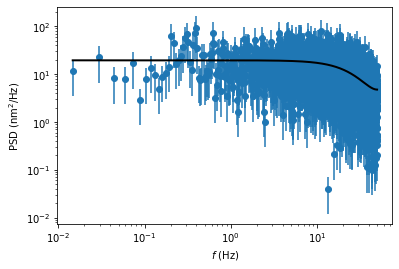

In [151]:
psd.plot()
psd.results

In [68]:
import tweezepy.smmcalibration as smm
npzdata = np.load('test_data.npz')
xtrace = npzdata['data']

av = smm.AV(xtrace,100)
av.mlefit()
np.random.seed(0)
av.mcmc(walkers=10,steps =200)
np.savez('test_AV_mcmc.npz',samples = av.samples,**av.mc_errors)

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 124.63it/s]


In [92]:
av.data

{'x': array([1.000e-02, 2.000e-02, 4.000e-02, 8.000e-02, 1.600e-01, 3.200e-01,
        6.400e-01, 1.280e+00, 2.560e+00, 5.120e+00, 1.024e+01, 2.048e+01]),
 'shape': array([5.119e+03, 2.559e+03, 1.279e+03, 6.390e+02, 3.190e+02, 1.590e+02,
        7.900e+01, 3.900e+01, 1.900e+01, 9.000e+00, 4.000e+00, 2.000e+00]),
 'y': array([7.78203474e+02, 6.42936732e+02, 3.92704571e+02, 2.21057605e+02,
        1.11211058e+02, 5.83103611e+01, 3.51996944e+01, 1.99791947e+01,
        6.58461347e+00, 2.72250991e+00, 1.17223175e+00, 6.66961876e-01]),
 'yerr': array([10.87678642, 12.70963549, 10.98071663,  8.7449037 ,  6.22662387,
         4.62431243,  3.96027502,  3.19923156,  1.51061393,  0.9075033 ,
         0.58611587,  0.47161326]),
 'yfit': array([780.098555  , 634.07710155, 400.03122036, 221.58351374,
        116.18680609,  59.44216551,  30.05827337,  15.11343434,
          7.57779158,   3.7941644 ,   1.89839935,   0.94952896])}

In [90]:
import json
import tweezepy.smmcalibration as smm
npzdata = np.load('test_data.npz')
xtrace = npzdata['data']

psd = smm.PSD(xtrace,100,2)
psd.mlefit()
np.random.seed(0)
psd.mcmc(walkers=10,steps =200)
json.dump(psd.samples,'test_PSD_samples.txt')
#np.savez('test_PSD_mcmc.npz',samples = psd.samples,**psd.mc_errors)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 58.31it/s]


TypeError: Object of type ndarray is not JSON serializable

In [91]:
psd.samples

array([[1.03379117e-05, 2.06382813e-03],
       [9.94623339e-06, 2.07932671e-03],
       [9.85194120e-06, 2.05612253e-03],
       [1.00770803e-05, 2.08561141e-03],
       [1.08812942e-05, 2.10252516e-03],
       [1.01935818e-05, 2.03733472e-03],
       [9.96341131e-06, 2.06372776e-03],
       [1.00193334e-05, 2.06799772e-03],
       [1.05909529e-05, 2.10565629e-03],
       [9.81074211e-06, 2.06382437e-03],
       [1.12279981e-05, 2.10041661e-03],
       [1.00749088e-05, 2.08765013e-03],
       [1.01113826e-05, 2.06970200e-03],
       [1.02738074e-05, 2.08509432e-03],
       [1.04709969e-05, 2.08505977e-03],
       [1.03725540e-05, 2.06702833e-03],
       [1.03821044e-05, 2.07363212e-03],
       [9.68071739e-06, 2.05982039e-03],
       [1.01736900e-05, 2.06766790e-03],
       [9.82378495e-06, 2.06431009e-03],
       [1.02052754e-05, 2.07191903e-03],
       [1.01939058e-05, 2.10275116e-03],
       [1.02547450e-05, 2.05980035e-03],
       [1.00926136e-05, 2.09453807e-03],
       [1.035078

In [54]:
first = {'samples':psd.samples,**psd.mc_errors}

In [70]:
tested = {'samples':av.samples,
          'a':av.mc_errors['a'],
          'k':av.mc_errors['k']}

In [83]:
load = np.load('test_AV_mcmc.npz')
load.items()

ItemsView(<numpy.lib.npyio.NpzFile object at 0x000002B06A90C6C8>)

In [88]:
dict(load)

{'samples': array([[9.27946976e-06, 2.00181551e-03],
        [9.89027787e-06, 1.99884887e-03],
        [9.47350114e-06, 1.97766746e-03],
        [9.59645785e-06, 2.01220669e-03],
        [1.04309353e-05, 2.07164440e-03],
        [9.16407470e-06, 1.97734045e-03],
        [9.51886455e-06, 1.99650656e-03],
        [9.89735908e-06, 2.01854224e-03],
        [9.86521829e-06, 2.03966161e-03],
        [9.62499410e-06, 2.01743757e-03],
        [9.40366850e-06, 2.04444352e-03],
        [9.83211108e-06, 2.00432096e-03],
        [9.20142730e-06, 1.98098545e-03],
        [9.67391320e-06, 2.02976893e-03],
        [9.99634605e-06, 2.03887982e-03],
        [9.88587246e-06, 2.01517592e-03],
        [9.19974165e-06, 1.98765726e-03],
        [9.77123978e-06, 1.99226516e-03],
        [9.75909001e-06, 2.01912268e-03],
        [1.03390259e-05, 2.05104317e-03],
        [9.61933259e-06, 2.01744033e-03],
        [9.81101776e-06, 2.01391328e-03],
        [9.02217034e-06, 1.96183024e-03],
        [9.00408895e-06

In [81]:
tested == load

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [38]:
psd.mcmc(walkers=10,steps=200)

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 104.01it/s]


In [39]:
psd.mc_errors

{'a': array([4.51758786e-07, 4.14191065e-07]),
 'k': array([3.47375996e-05, 3.83579831e-05])}

In [22]:
psd = smm.PSD(xtrace,100,2)
psd.mlefit()
np.random.seed(0)
psd.mcmc()

100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [01:16<00:00, 19.73it/s]


In [24]:
psd.mcmc?

In [15]:
psd.params = [1,1]

AttributeError: can't set attribute

In [95]:
import unittest
class AVTestCase(unittest.TestCase):
    @classmethod
    def setUpClass(AV):
        npzdata = np.load('test_data.npz')
        xtrace = npzdata['data']
        AV.test = smm.AV(xtrace,100)
        #self.xtrace = xtrace
    @classmethod
    def test_MLEfit(AV):
        av = AV.test
avtest = AVTestCase()
avtest.test_MLEfit()
#avtest.setUpClass

AttributeError: type object 'AVTestCase' has no attribute 'test'

In [106]:
npzdata = np.load('test_data.npz')
xtrace = npzdata['data']
av = smm.AV(xtrace,100)
results

{'a': 9.44356423639137e-06,
 'a|err': 5.632107673023016e-07,
 'k': 0.001995172820444941,
 'k|err': 4.227637164710647e-05,
 'redchi2': 1.0345249458753432,
 'success': True}

In [114]:
results.values()

dict_values([9.44356423639137e-06, 5.632107673023016e-07, 0.001995172820444941, 4.227637164710647e-05, 1.0345249458753432, True])

In [118]:
test = np.load('test_AV_MLEfit.npz')
test.files

['a', 'a|err', 'k', 'k|err', 'redchi2', 'success']

In [120]:
test['a'] == results['a']

True

In [129]:
dict(test.items()) == results

True